## Import modules

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims

## Specify experiment directory

In [2]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/'
protein="TNR" #TNR,Agg,WFA,HABP

## Make results dict and load aligned images from matlab GUI

In [3]:
#make synapse results dictionary
spots={"filename":[]}
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    #if "_analyse" in str(filelist[i]):        
        if ("samecell" in str(filelist[i]))==True:
            if ("output_classification" in str(filelist[i]))==True:
                if (protein in str(filelist[i]))==True:
                    if ("backup" in str(filelist[i]))==False:
                        if filelist[i].endswith(".txt"): 
                            #if str(filelist[i][:-12]) not in str(spots["filename"]):
                                spots["filename"].append(filelist[i])
synapses_results={"spots classification filename":[],
                "sted spot":[],
                "vglut spot":[],
                "dio spot":[],
                "sted spot aligned":[],
                "vglut spot aligned":[],
                "dio spot aligned":[],
                 "sted spot aligned no back":[],
                "vglut spot aligned no back":[],
                "dio spot aligned no back":[],
                "Exp name":[],
                "Cell number":[],
                "unique id (expname_cell number)":[],
                "classification":[],
                  "mean ecm intensity sted":[],
                  "ecm intensity sted, bg subtracted":[],
                  "mean ecm intensity sted noback":[],
                  "ecm intensity sted noback bg subtracted":[],
                  "mean vglut intensity sted":[],
                  "vglut intensity sted, bg subtracted":[],
                  "mean vglut intensity sted noback":[],
                  "vglut intensity sted noback bg subtracted":[],
                  "mean vglut size (sum of pixels)":[],
                  "mean vglut size (sum of pixels) from noback":[],
                  "exp condition":[]}
for spot in range(0,len(spots["filename"])):
    print(spots["filename"][spot])
    firstpart='/'.join(spots["filename"][spot].split("/")[:-1])
    lastpart=spots["filename"][spot].split("classification")[-1]
    synapses_results["spots classification filename"].append(spots["filename"][spot])
    file2read=firstpart+'/output_sted_'+lastpart
    synapses_results["sted spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_'+lastpart
    synapses_results["vglut spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_'+lastpart
    synapses_results["dio spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_sted_aligned_'+lastpart
    synapses_results["sted spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_aligned_'+lastpart
    synapses_results["vglut spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_aligned_'+lastpart
    synapses_results["dio spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_sted_aligned_noback_'+lastpart
    synapses_results["sted spot aligned no back"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_aligned_noback_'+lastpart
    synapses_results["vglut spot aligned no back"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_aligned_noback_'+lastpart
    synapses_results["dio spot aligned no back"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
  
    synapses_results["Exp name"].append(file2read.split("2019")[-1][0:4])
    synapses_results["Cell number"].append(lastpart[-9:-4])
    synapses_results["unique id (expname_cell number)"].append(file2read.split("2019")[-1][0:4]+'_'+lastpart[-9:-4])
    synapses_results["classification"].append(np.loadtxt(spots["filename"][spot]))
    synapses_results["exp condition"].append(synapses_results["spots classification filename"][spot].split("TIFs")[-1].split('/')[1])
    
    synapses_results["mean ecm intensity sted"].append(np.nan)
    synapses_results["ecm intensity sted, bg subtracted"].append(np.nan)
    synapses_results["mean ecm intensity sted noback"].append(np.nan)
    synapses_results["ecm intensity sted noback bg subtracted"].append(np.nan)
    synapses_results["mean vglut intensity sted"].append(np.nan)
    synapses_results["vglut intensity sted, bg subtracted"].append(np.nan)
    synapses_results["mean vglut intensity sted noback"].append(np.nan)
    synapses_results["vglut intensity sted noback bg subtracted"].append(np.nan)
    synapses_results["mean vglut size (sum of pixels)"].append(np.nan)
    synapses_results["mean vglut size (sum of pixels) from noback"].append(np.nan)

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification2_11_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification3_12_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification8_17_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification10_20_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification136_36_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification139_3_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification140_40_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification142_5_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification300_36_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification302_38_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification303_39_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification306_41_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonl

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification444_22_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification445_23_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification447_25_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification449_27_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonl

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification45_12_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification46_13_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification51_18_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification62_2_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bi

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification212_3_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification213_4_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification227_18_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification232_22_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification5_3_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification8_6_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification9_7_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification17_1_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIF

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification121_8_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification122_9_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification136_22_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification151_3_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification380_15_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification382_1_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification386_5_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification387_6_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification44_7_05_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification46_9_05_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification47_10_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification50_13_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification54_17_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification55_1_05_02.txt
/Volumes/ukps

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification223_7_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification224_8_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification226_11_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification232_17_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification236_22_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification245_8_06_01.txt
/Volume

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification58_15_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification61_18_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification62_19_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification63_20_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification65_22_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification194_17_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification195_18_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification196_19_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification211_34_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification213_36_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Co

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification314_3_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification316_41_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification317_42_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification319_44_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification320_45_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Con

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification39_14_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification43_18_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification45_21_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification48_24_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification49_25_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification58_34_03_02.txt
/Vol

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification191_11_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification192_12_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification195_16_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification199_6_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification202_10_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification206_14_04_02.txt

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification52_27_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification54_29_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification56_31_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification59_34_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification60_35_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblock

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification156_66_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification157_67_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification160_6_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification161_7_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification165_2_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblo

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification306_31_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification307_32_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification308_33_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification310_35_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification316_42_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Un

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification31_7_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification32_8_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification36_12_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification37_13_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification41_17_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification45_21_03_0

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification161_21_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification163_23_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification167_27_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification170_30_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification175_35_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification178

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification379_6_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification383_10_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification384_11_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification387_14_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification389_16_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification392_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification42_27_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification47_31_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification49_33_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification53_37_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification56_3_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification64_6_05_02.txt


/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification158_9_05_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification161_12_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification164_15_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification166_2_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification168_4_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification173_9_05_04.

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification401_43_06_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification416_5_06_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification427_6_06_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification444_1_06_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification449_6_06_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification455_12_06_05.

## Calculate the mean intensity of TNR in the individual spots

In [7]:
for spotno in range(0,len(synapses_results["spots classification filename"])):
    synapses_results["mean ecm intensity sted"][spotno]=np.nanmean(synapses_results["sted spot aligned"][spotno])
    synapses_results["mean ecm intensity sted noback"][spotno]=np.nanmean(synapses_results["sted spot aligned no back"][spotno])
    #bg subtraction
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["sted spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["ecm intensity sted, bg subtracted"][spotno]=(ecm_around_spot_bgsub)

## Make dataframe of results

In [33]:
df=pd.DataFrame(synapses_results)
#make df, which also contains column names for plotting (drug, condition)
df['Time']='None'
df.loc[df['spots classification filename'].str.contains('12hr'), 'Time'] = '12hrs'
df.loc[df['spots classification filename'].str.contains('Ctrl'), 'Time'] = 'Unblocked Control'
df.loc[df['spots classification filename'].str.contains('Control'), 'Time'] = 'Unblocked Control'

df["Drug"]='None'
df.loc[df['spots classification filename'].str.contains('Bic'), 'Drug'] = 'Bic'
df.loc[df['spots classification filename'].str.contains('bic'), 'Drug'] = 'Bic'
df.loc[df['spots classification filename'].str.contains('DMSO'), 'Drug'] = 'DMSO'
df.loc[df['spots classification filename'].str.contains('Ctrl'), 'Drug'] = 'DMSO'
df.loc[df['spots classification filename'].str.contains('Control'), 'Drug'] = 'DMSO'

#nicely written treatment condition for plotting
df['Condition']='None'
df.loc[df['spots classification filename'].str.contains('12hr_Bic'), 'Condition'] = '12hr + Bic'
df.loc[df['spots classification filename'].str.contains('12hr_DMSO'), 'Condition'] = '12hr'
df.loc[df['spots classification filename'].str.contains('Control'), 'Condition'] = 'Unblocked Control'
df.loc[df['spots classification filename'].str.contains('12hrs_Bic'), 'Condition'] = '12hr + Bic'
df.loc[df['spots classification filename'].str.contains('12hrs_DMSO'), 'Condition'] = '12hr'

## Display a random excised image

Text(0.5, 1.0, 'dio around synapse spot')

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


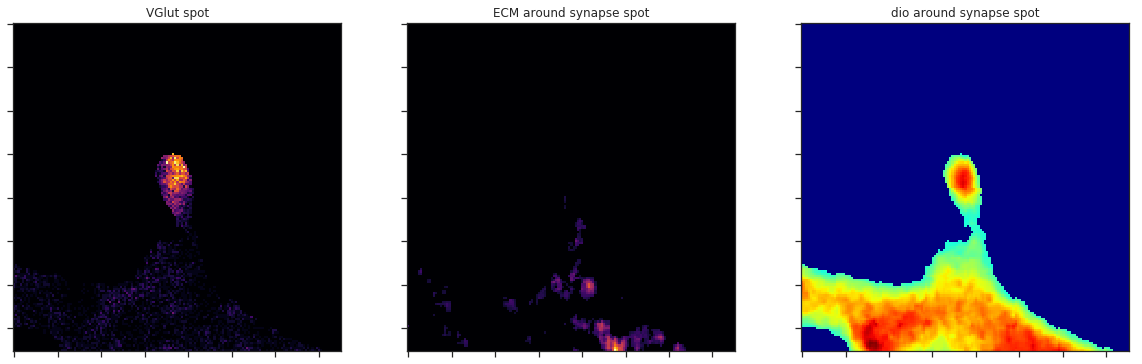

In [34]:
randomno=np.random.randint(1,len(df))
fig=plt.figure(figsize=(20,20))
fig.add_subplot(131)
plt.imshow(df["vglut spot aligned"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('VGlut spot')
fig.add_subplot(132)
plt.imshow(df["sted spot aligned"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('ECM around synapse spot')
fig.add_subplot(133)
plt.imshow(df["dio spot aligned"][randomno],cmap='jet')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('dio around synapse spot')

## Calculate mean intensities, bg subtraction, filter by DiO channel

In [35]:
df["ecm intensity sted, bg subtracted under dio"]=df["ecm intensity sted, bg subtracted"]
df["mean ecm intensity sted, bg subtracted"]=np.nan
df["mean ecm intensity sted, bg subtracted under dio"]=np.nan
df["mean vglut intensity sted, bg subtracted"]=np.nan
for i in range(0,len(df)):
    df["mean ecm intensity sted, bg subtracted"][i]=df["ecm intensity sted, bg subtracted"][i].mean()    
    diomask=df["dio spot aligned"][i]>0
    image=df["sted spot aligned"][i]
    image[~diomask]=0
    df["ecm intensity sted, bg subtracted under dio"][i]=image
    df["mean ecm intensity sted, bg subtracted under dio"][i]=image.mean()    

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init

## Calculate a ratio for each cell

In [36]:
dict_cellratios={"cell id":[],"Exp name":[],"time":[], "drug":[],"condition":[],
                 "axon mean int bg subtracted":[],
                "dendrite mean int bg subtracted":[],
                 "axon mean int bg subtracted under dio":[],
                "dendrite mean int bg subtracted under dio":[],
                "mushroom mean int bg subtracted":[],
                "flat mean int bg subtracted":[],
                 "ratio axon to dendrite":[],
                 "ratio axon to mushroom":[],
                 "ratio axon to flat":[]
                }
for cellid in df["unique id (expname_cell number)"].unique():
    dfcell=df[df["unique id (expname_cell number)"]==cellid]
    dict_cellratios["cell id"].append(cellid)
    dict_cellratios["Exp name"].append(dfcell["Exp name"].unique()[0])
    dict_cellratios["time"].append(dfcell["Time"].unique()[0])
    dict_cellratios["drug"].append(dfcell["Drug"].unique()[0])
    dict_cellratios["condition"].append(dfcell["Condition"].unique()[0])
    
    axonmean=dfcell[dfcell["classification"]==3]["mean ecm intensity sted, bg subtracted"].mean()
    dendritemean=dfcell[(dfcell["classification"]!=3)&(dfcell["classification"]!=4)]["mean ecm intensity sted, bg subtracted"].mean()
    mushroommean=dfcell[dfcell["classification"]==1]["mean ecm intensity sted, bg subtracted"].mean()
    flatmean=dfcell[dfcell["classification"]==2]["mean ecm intensity sted, bg subtracted"].mean()
    
    axondio=dfcell[dfcell["classification"]==3]["mean ecm intensity sted, bg subtracted under dio"].mean()
    dendritedio=dfcell[(dfcell["classification"]!=3)&(dfcell["classification"]!=4)]["mean ecm intensity sted, bg subtracted under dio"].mean()

    ratioaxdendrite=axonmean/dendritemean
    ratioaxmush=axonmean/mushroommean
    ratioaxflat=axonmean/flatmean
    
    dict_cellratios["axon mean int bg subtracted"].append(axonmean)
    dict_cellratios["dendrite mean int bg subtracted"].append(dendritemean)    
    dict_cellratios["mushroom mean int bg subtracted"].append(mushroommean)    
    dict_cellratios["flat mean int bg subtracted"].append(flatmean)    
    dict_cellratios["ratio axon to dendrite"].append(ratioaxdendrite)
    dict_cellratios["ratio axon to mushroom"].append(ratioaxmush)
    dict_cellratios["ratio axon to flat"].append(ratioaxflat)    
    dict_cellratios["axon mean int bg subtracted under dio"].append(axondio)
    dict_cellratios["dendrite mean int bg subtracted under dio"].append(dendritedio)

## Make a dataframe

In [23]:
dfcells=pd.DataFrame(dict_cellratios)

## Save dataframe to pickle

In [17]:
dfcells.to_pickle(expdir+'dfcells.pkl')

## Read dataframe from pickle

In [3]:
dfcells=pd.read_pickle(expdir+'dfcells.pkl')

## Plot ratios

In [24]:
dfplot = dfcells[np.isfinite(dfcells['axon mean int bg subtracted'])]
dfplot = dfplot[np.isfinite(dfcells['dendrite mean int bg subtracted'])]

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Outlier removal

## Number of cells

In [25]:
for condition in dfcells["condition"].unique():
    print(condition+': '+str(len(dfplot[dfplot["condition"]==condition])))

12hr: 22
12hr + Bic: 21
Unblocked Control: 17


## Plot All epitopes

<Figure size 432x288 with 0 Axes>

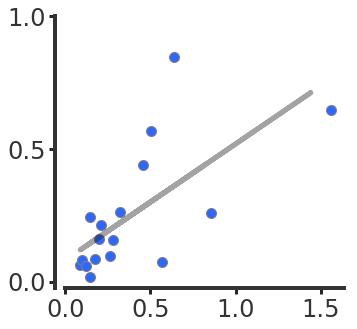

In [27]:
df2plot=dfplot[dfplot["condition"]=="Unblocked Control"]
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")


fig=plt.figure(figsize=(5,5))


g=sns.scatterplot(x="dendrite mean int bg subtracted under dio",
              y="axon mean int bg subtracted under dio",
                data=df2plot,s=100,color="#2F67F8",linewidth=1,edgecolor='grey')


#fit linear 
x=df2plot["dendrite mean int bg subtracted"].dropna()
y=df2plot["axon mean int bg subtracted"].dropna()
m,b = np.polyfit(x, y, 1) 
plt.plot( x, m*x+b, 'k',alpha=.4,linewidth=5) 

#formatting
plt.rcParams['font.sans-serif'] = 'Helvetica'
g.grid(False)
g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=False,offset=offsets)
g.set_ylabel('')
g.set_xlabel('')


plt.yticks([0,.5,1],color='#333333',size=24)
plt.xticks([0,.5,1,1.5],color='#333333',size=24)



diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp2_axon_dendrite_ratio_allepitopes.svg', bbox_inches='tight', format='svg')

## Pearson's R and pvalue

In [28]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(x,y)
print('R^2: '+str(pearson**2))
print('pval: '+str(pval))
print(pearson)
print('slope = '+str(m))

R^2: 0.4368256935774648
pval: 0.0038696636156300467
0.6609279034641107
slope = 0.43818536967689864


## Plot - 12 h DMSO (new epitopes)

<Figure size 432x288 with 0 Axes>

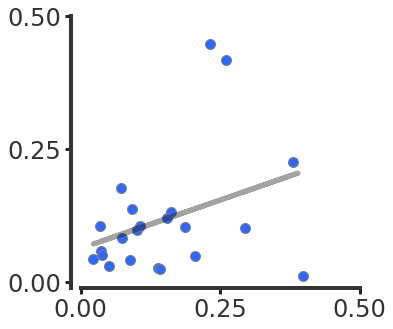

In [29]:
df2plot=dfplot[dfplot["condition"]=="12hr"]
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")


fig=plt.figure(figsize=(5,5))


g=sns.scatterplot(x="dendrite mean int bg subtracted under dio",
              y="axon mean int bg subtracted under dio",
                data=df2plot,s=100,color="#2F67F8",linewidth=1,edgecolor='grey')


#fit linear 
x=df2plot["dendrite mean int bg subtracted"].dropna()
y=df2plot["axon mean int bg subtracted"].dropna()
m,b = np.polyfit(x, y, 1) 
plt.plot( x, m*x+b, 'k',alpha=.4,linewidth=5) 

#formatting
plt.rcParams['font.sans-serif'] = 'Helvetica'
g.grid(False)
g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=False,offset=offsets)
g.set_ylabel('')
g.set_xlabel('')


plt.yticks([0,.25,.50],color='#333333',size=24)
plt.xticks([0,.25,.50],color='#333333',size=24)

diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp2_axon_dendrite_ratio_12hrdmso.svg', bbox_inches='tight', format='svg')

In [30]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(x,y)
print('R^2: '+str(pearson**2))
print('pval: '+str(pval))
print(pearson)
print('slope = '+str(m))

R^2: 0.11762398152709848
pval: 0.1181538702781864
0.3429635279838054
slope = 0.3640262747382964


## Plot 12h + bic new epitopes

<Figure size 432x288 with 0 Axes>

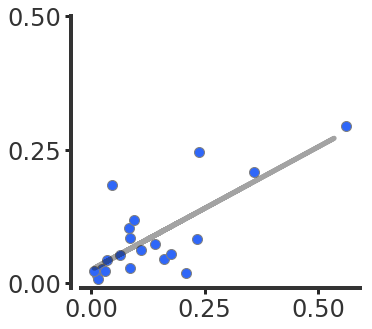

In [31]:
df2plot=dfplot[dfplot["condition"]=="12hr + Bic"]
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")


fig=plt.figure(figsize=(5,5))


g=sns.scatterplot(x="dendrite mean int bg subtracted under dio",
              y="axon mean int bg subtracted under dio",
                data=df2plot,s=100,color="#2F67F8",linewidth=1,edgecolor='grey')


#fit linear 
x=df2plot["dendrite mean int bg subtracted"].dropna()
y=df2plot["axon mean int bg subtracted"].dropna()
m,b = np.polyfit(x, y, 1) 
plt.plot( x, m*x+b, 'k',alpha=.4,linewidth=5) 

#formatting
plt.rcParams['font.sans-serif'] = 'Helvetica'
g.grid(False)
g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=False,offset=offsets)
g.set_ylabel('')
g.set_xlabel('')


plt.yticks([0,.25,.50],color='#333333',size=24)
plt.xticks([0,.25,.50],color='#333333',size=24)

diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp2_axon_dendrite_ratio_12hrbic.svg', bbox_inches='tight', format='svg')

In [32]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(x,y)
print('R^2: '+str(pearson**2))
print('pval: '+str(pval))
print(pearson)
print('slope = '+str(m))

R^2: 0.557647430463571
pval: 0.00010075764707910313
0.7467579463678783
slope = 0.4602833733621861
